In [2]:
import cv2, numpy as np, os, radialProfile, glob, pickle
from matplotlib import pyplot as plt
from scipy.interpolate import griddata
from sklearn.svm import SVC
from create_features import multiclass_data

# Create Training Dataset

In [2]:
train_files = [
    "data/train/deepfake",
    "data/train/face2face",
    "data/train/faceswap"
]

train_pickle_out = "data/multiclass_test_10k.pkl"

multiclass_data(10000, train_files, train_pickle_out, epsilon=10)

# Checking dataset

Text(0, 0.5, 'Power Spectrum')

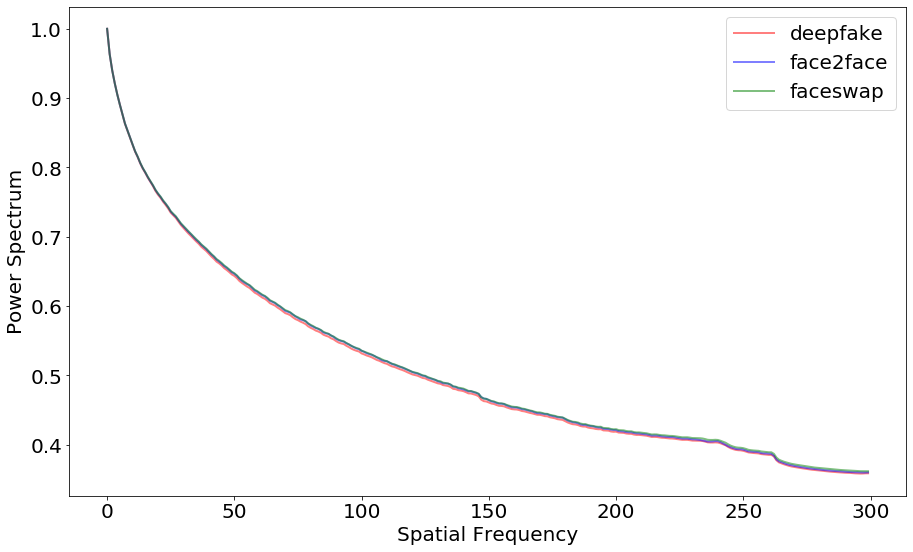

In [3]:
# load feature file
train_pickle_out = "data/multiclass_10k.pkl"
pkl_file = open(train_pickle_out, 'rb')
data = pickle.load(pkl_file)

data_n = data.values
pkl_file.close()
X = data["data"]
y = data["label"]

num = int(X.shape[0]/3)
num_feat = X.shape[1]

# deepfake
psd1D_org_0 = np.zeros((num,num_feat))
psd1D_org_0_mean = np.zeros(num_feat)
psd1D_org_0_std = np.zeros(num_feat)
# face2face
psd1D_org_1 = np.zeros((num,num_feat))
psd1D_org_1_mean = np.zeros(num_feat)
psd1D_org_1_std = np.zeros(num_feat)
# faceswap
psd1D_org_2 = np.zeros((num,num_feat))
psd1D_org_2_mean = np.zeros(num_feat)
psd1D_org_2_std = np.zeros(num_feat)

cont_0 = 0
cont_1 = 0
cont_2 = 0

# We separate real and fake using the label
for x in range(X.shape[0]):
    if y[x]==0:
        psd1D_org_0[cont_0,:] = X[x,:]
        cont_0+=1
    elif y[x]==1:
        psd1D_org_1[cont_1,:] = X[x,:]
        cont_1+=1
    elif y[x]==2:
        psd1D_org_2[cont_2,:] = X[x,:]
        cont_2+=1

# We compute statistcis
for x in range(num_feat):
    # 0
    psd1D_org_0_mean[x] = np.mean(psd1D_org_0[:,x])
    psd1D_org_0_std[x]= np.std(psd1D_org_0[:,x])
    # 1
    psd1D_org_1_mean[x] = np.mean(psd1D_org_1[:,x])
    psd1D_org_1_std[x]= np.std(psd1D_org_1[:,x])
    # 2
    psd1D_org_2_mean[x] = np.mean(psd1D_org_2[:,x])
    psd1D_org_2_std[x]= np.std(psd1D_org_2[:,x])
    
# Plot
x = np.arange(0, num_feat, 1)
fig, ax = plt.subplots(figsize=(15, 9))

# 0
ax.plot(x, psd1D_org_0_mean, alpha=0.5, color='red', label='deepfake', linewidth =2.0)

# 1
ax.plot(x, psd1D_org_1_mean, alpha=0.5, color='blue', label='face2face', linewidth =2.0)

# 2
ax.plot(x, psd1D_org_2_mean, alpha=0.5, color='green', label='faceswap', linewidth =2.0)


plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
ax.legend(loc='best', prop={'size': 20})
plt.xlabel("Spatial Frequency", fontsize=20)
plt.ylabel("Power Spectrum", fontsize=20)

# Training SVM

In [3]:
#Hyperameters
C_val=6.37
gamma_val = 0.86

train_pickle = "data/multiclass_10k.pkl"

#train
pkl_file = open(train_pickle, 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
X = data["data"]
y = data["label"]

svclassifier_r = SVC(C=C_val, kernel='rbf', gamma=gamma_val, probability=True)
svclassifier_r.fit(X, y)

pickle_svm_file = "data/pickled_classifiers/multiclass_SVM_C" + str(C_val) + "_gam" + str(gamma_val) + ".pkl"
output = open(pickle_svm_file, "wb+")
pickle.dump(svclassifier_r, output)
output.close()

In [4]:
test_pickle = "data/multiclass_test_2k.pkl"
pkl_file = open(test_pickle, 'rb')
data = pickle.load(pkl_file)
pkl_file.close()
X_ = data["data"]
y_ = data["label"]
SVM = svclassifier_r.score(X_, y_)
print("SVM: "+str(SVM))

SVM: 0.4661666666666667
